In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.rc("font", family = "Gulim")
plt.rc("axes", unicode_minus = False)

In [28]:
column_names = ["PatientID", "DGN", "PRE4", "PRE5", "PRE6", "PRE7", "PRE8", "PRE9", "PRE10", "PRE11", "PRE14", "PRE17", "PRE19", "PRE25", "PRE30", "PRE32", "AGE", "Risk1Yr"]  # 원하는 컬럼 이름 지정
df_thoraric = pd.read_csv("../../dataset/Thoracic Surgery.csv", header=None, names=column_names)


In [29]:
df_thoraric.head()

,PatientID,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [30]:
def summarize_dataframe(df):
    """
    데이터프레임의 다양한 정보를 출력하고, 이상치 확인을 위한 boxplot을 그리는 함수.
    
    Parameters:
    df (pd.DataFrame): 요약하려는 데이터프레임
    
    Returns:
    None
    """
    print("====== DataFrame Shape ======")
    print(f"Shape: {df.shape}")  # 데이터프레임의 크기
    
    print("\n====== DataFrame Columns ======")
    print(f"Columns: {df.columns.tolist()}")  # 컬럼 이름 출력
    
    print("\n====== DataFrame Info ======")
    df.info()  # 데이터프레임의 기본 정보
    
    print("\n====== DataFrame Description ======")
    display(df.describe(include='all'))  # 기술 통계
    
    print("\n====== Unique Values per Column ======")
    unique_vals = df.nunique()
    display(unique_vals)  # 각 컬럼의 고유값 수
    
    print("\n====== DataFrame Head (First 5 rows) ======")
    display(df.head())  # 첫 5개 행 출력
    
    print("\n====== DataFrame Missing Values ======")
    missing_values = df.isnull().sum()
    display(missing_values[missing_values > 0])  # 결측치가 있는 열들만 출력
    
    print("\n====== DataFrame Duplicates ======")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")  # 중복된 행의 수 출력
    
    # Boxplot 추가
    print("\n====== Boxplots for Outlier Detection ======")
    numeric_columns = df.select_dtypes(include='number').columns  # 수치형 컬럼만 선택
    num_cols = len(numeric_columns)
    
    for col in numeric_columns:
        # 데이터의 양에 따라 사이즈 조정 (행의 수에 따라 가로 크기 조정)
        data_size = len(df[col].dropna())  # 결측치 제외한 데이터 크기
        fig_width = max(8, min(data_size // 10, 20))  # 최소 8, 최대 20 크기로 가로 조정
        plt.figure(figsize=(fig_width, 4))  # 동적 사이즈 설정
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


====== DataFrame Shape ======
Shape: (470, 18)

====== DataFrame Columns ======
Columns: ['PatientID', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr']

====== DataFrame Info ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  470 non-null    int64  
 1   DGN        470 non-null    int64  
 2   PRE4       470 non-null    float64
 3   PRE5       470 non-null    float64
 4   PRE6       470 non-null    int64  
 5   PRE7       470 non-null    int64  
 6   PRE8       470 non-null    int64  
 7   PRE9       470 non-null    int64  
 8   PRE10      470 non-null    int64  
 9   PRE11      470 non-null    int64  
 10  PRE14      470 non-null    int64  
 11  PRE17      470 non-null    int64  
 12  PRE19      470 non-null    int64  
 13  PRE25      4

,PatientID,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000



====== Unique Values per Column ======


PatientID    470
DGN            7
PRE4         134
PRE5         136
PRE6           3
PRE7           2
PRE8           2
PRE9           2
PRE10          2
PRE11          2
PRE14          4
PRE17          2
PRE19          2
PRE25          2
PRE30          2
PRE32          2
AGE           45
Risk1Yr        2
dtype: int64


====== DataFrame Head (First 5 rows) ======


,PatientID,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0



====== DataFrame Missing Values ======


Series([], dtype: int64)


====== DataFrame Duplicates ======
Number of duplicate rows: 0

====== Boxplots for Outlier Detection ======


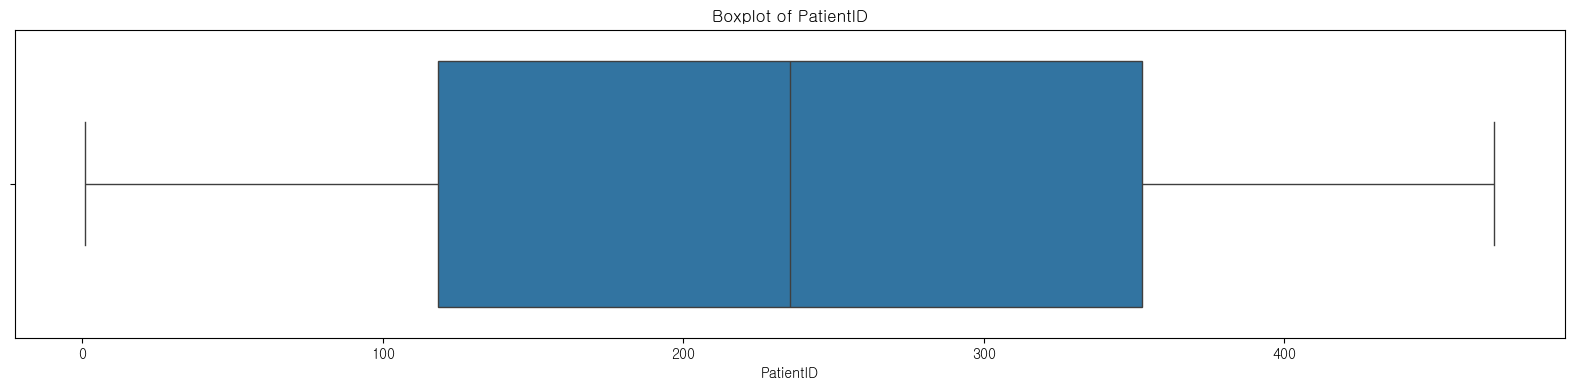

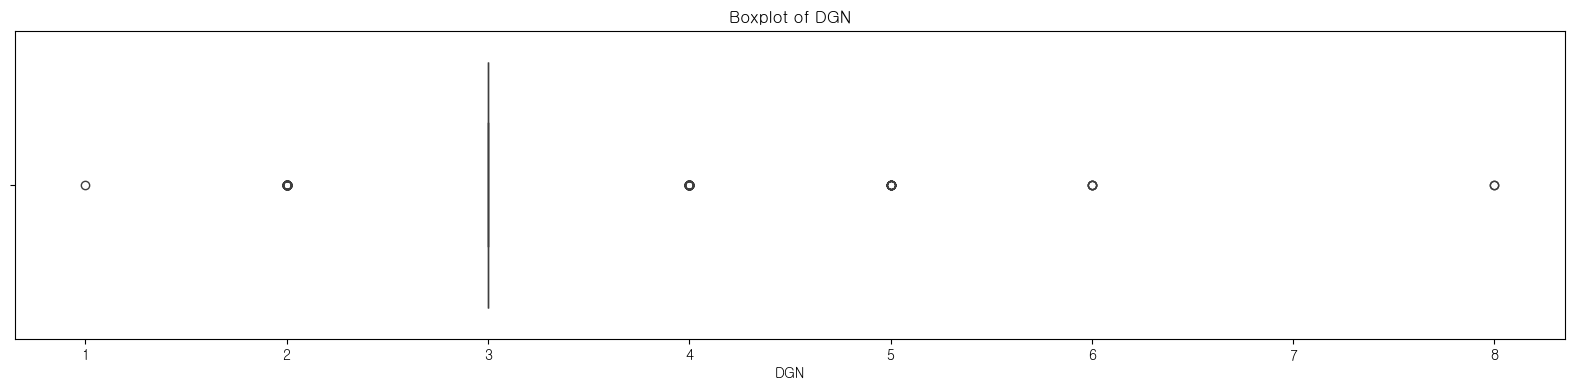

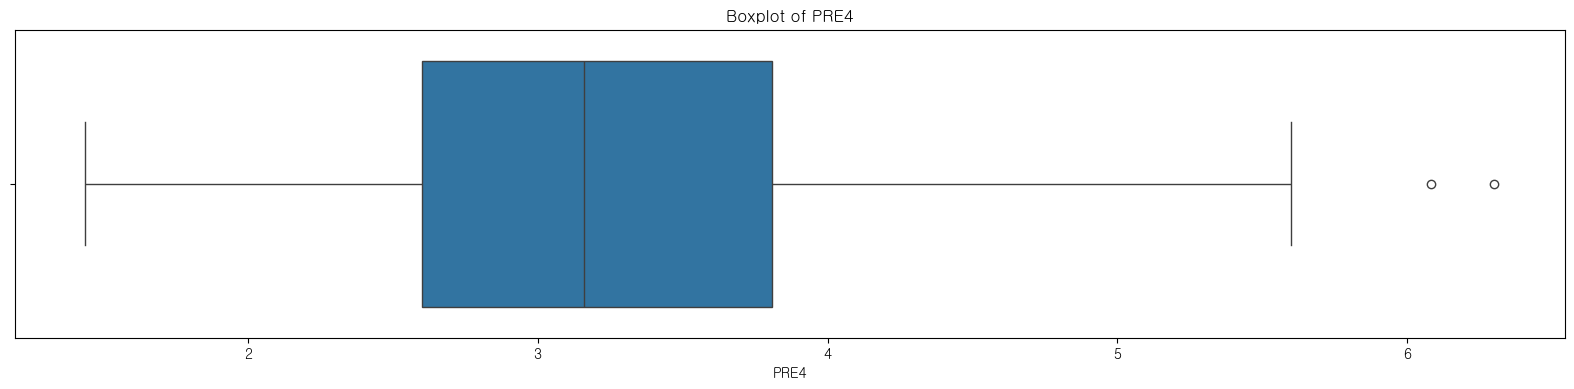

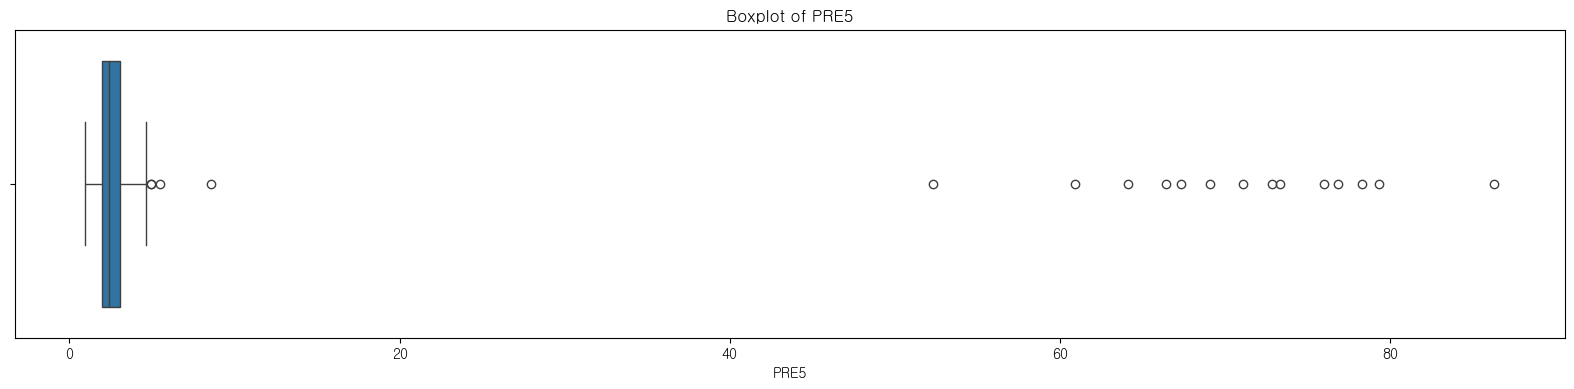

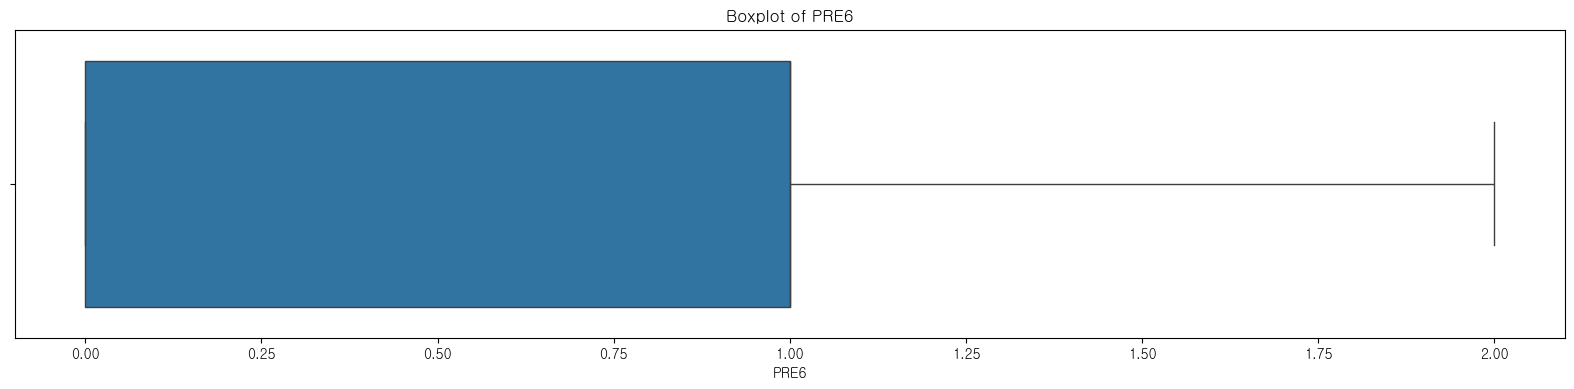

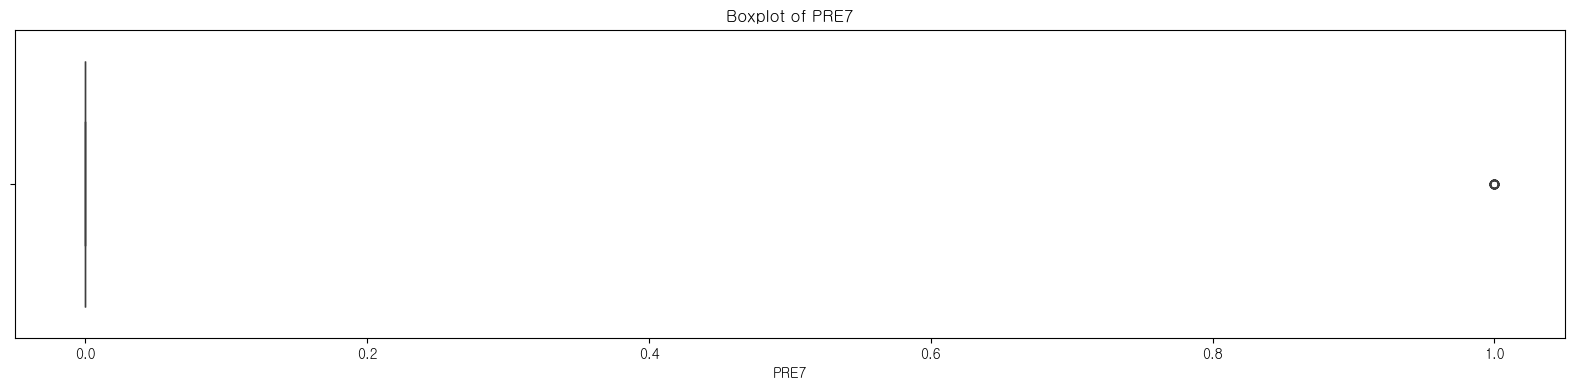

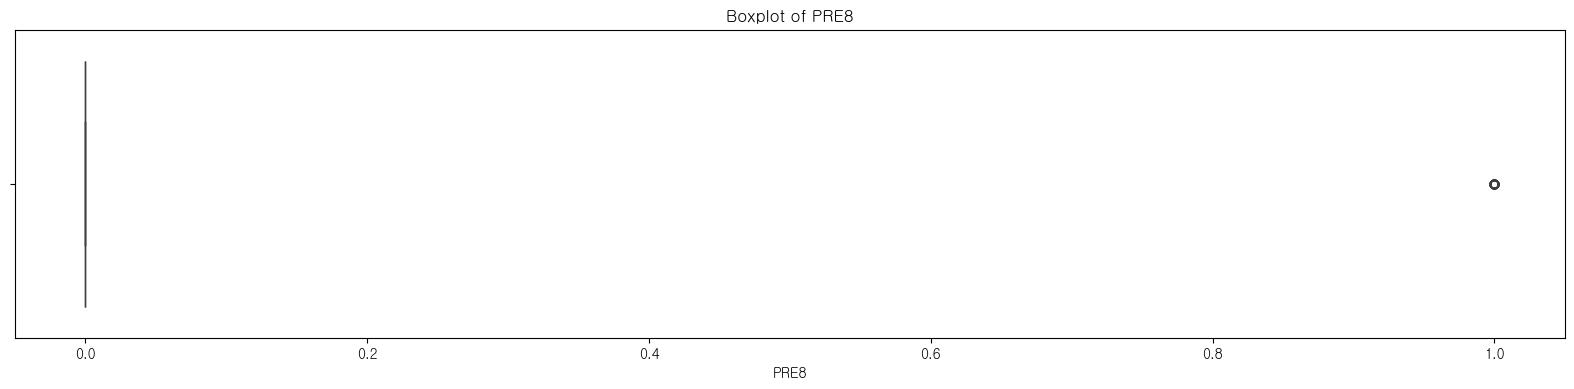

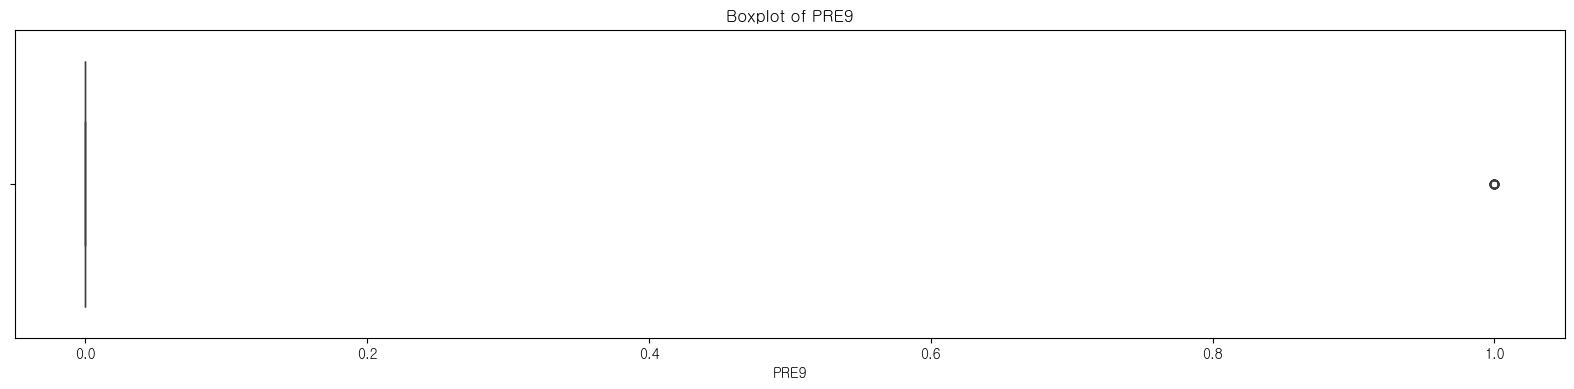

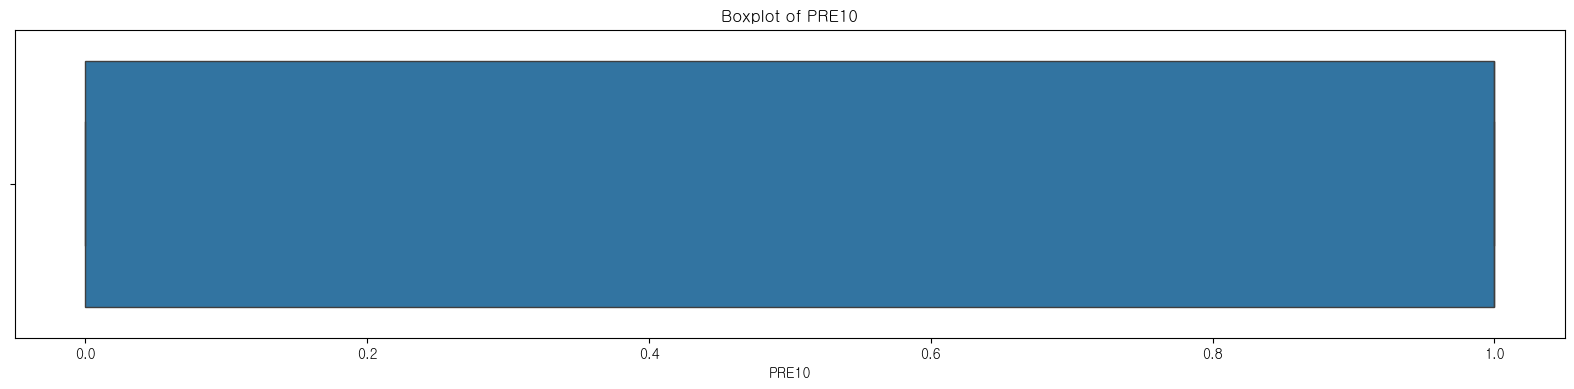

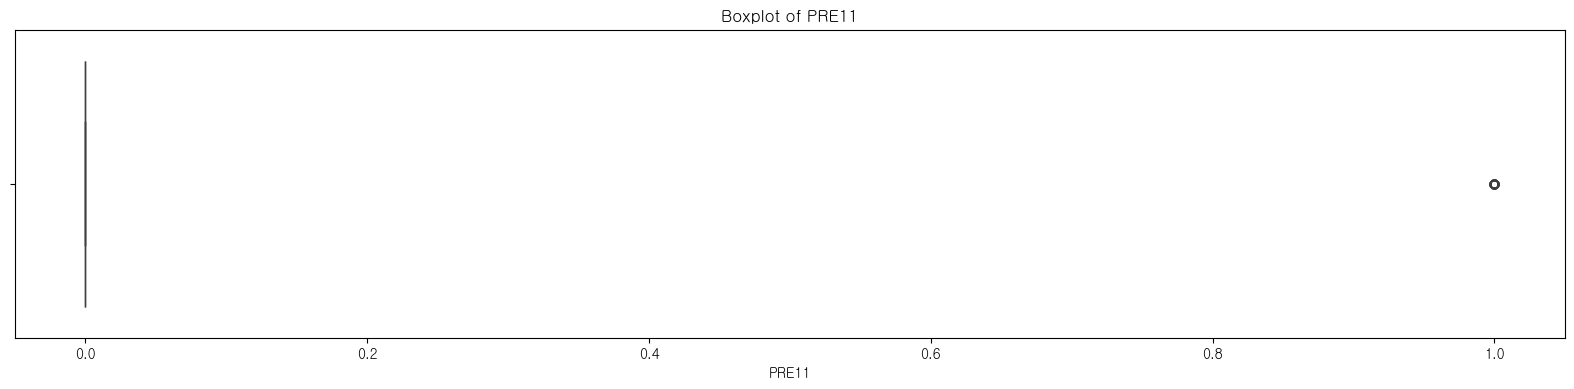

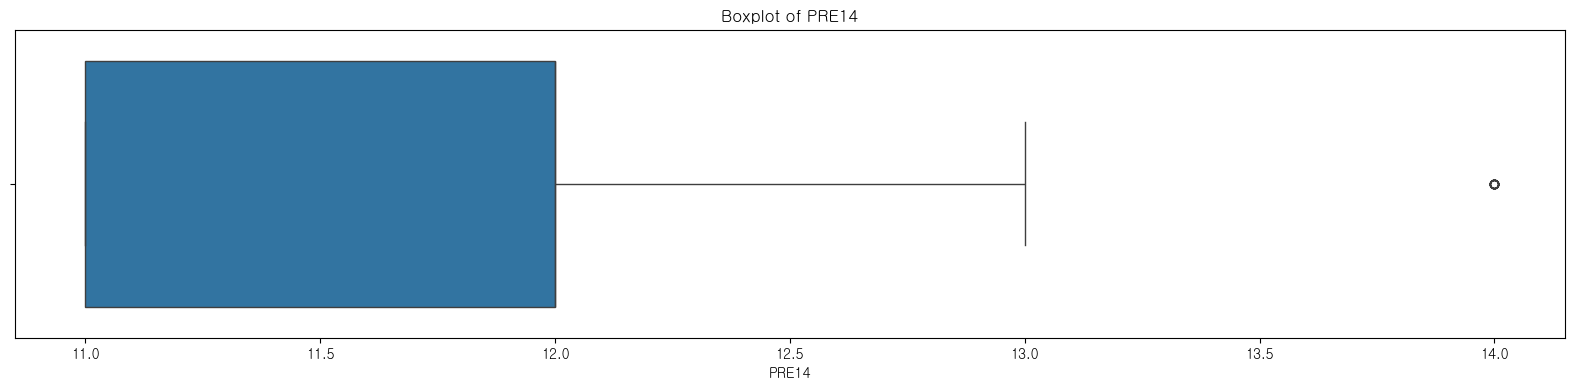

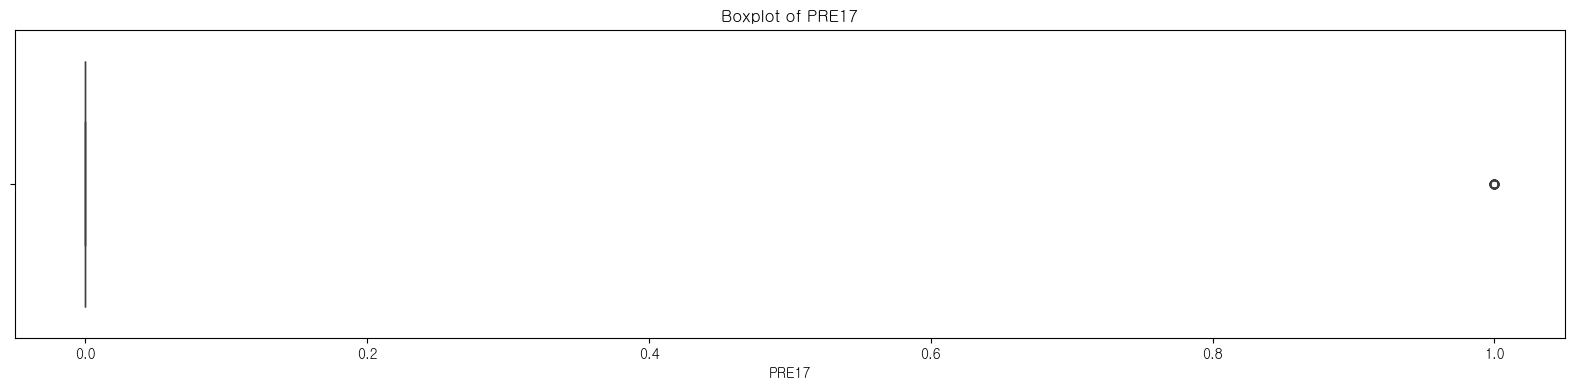

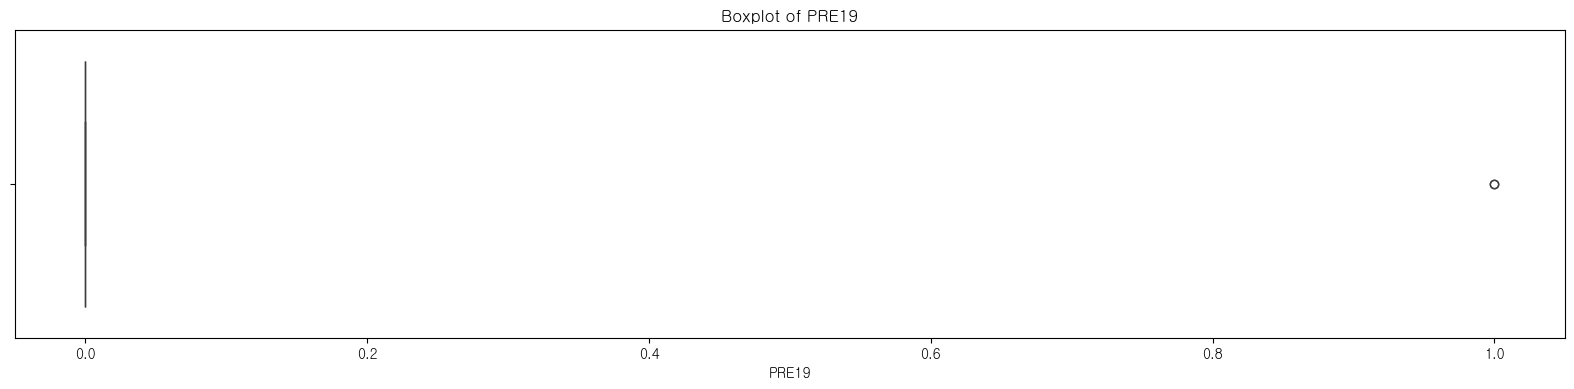

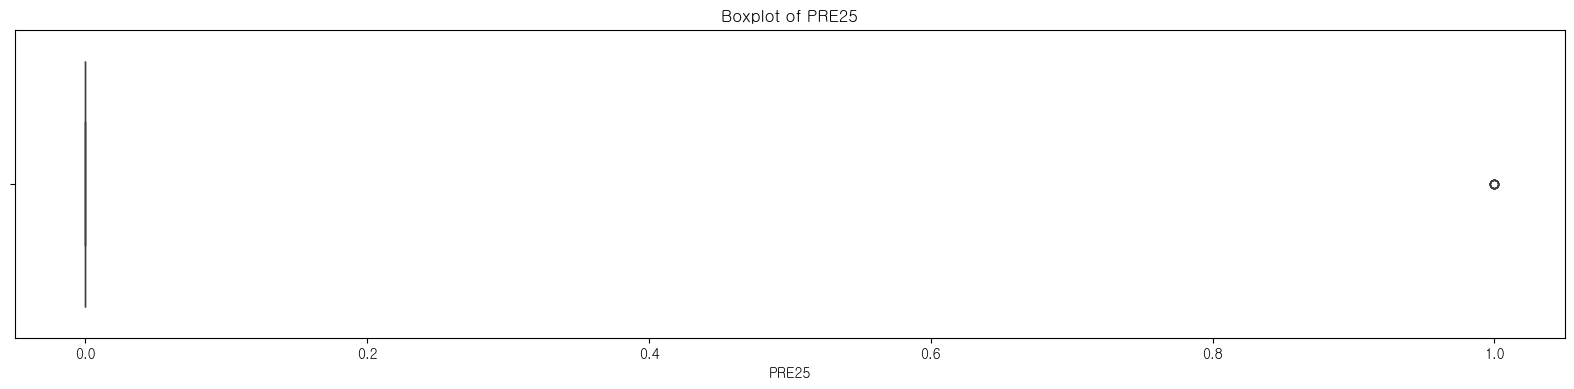

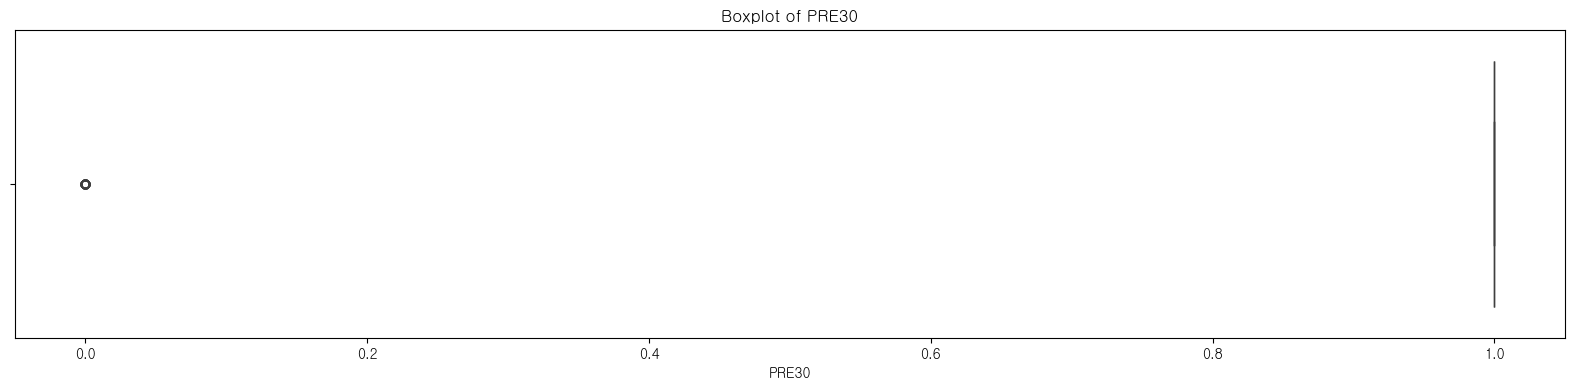

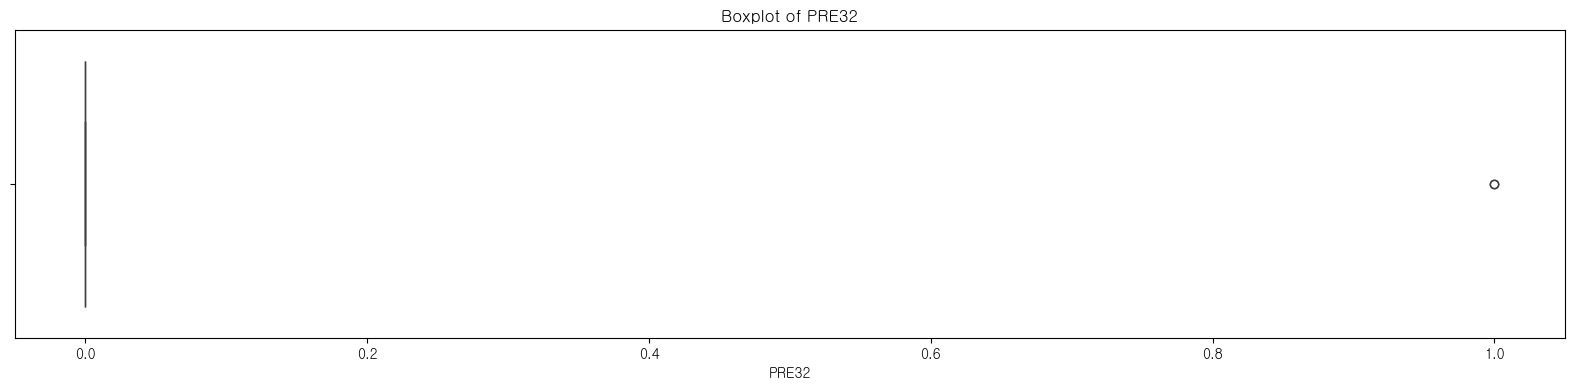

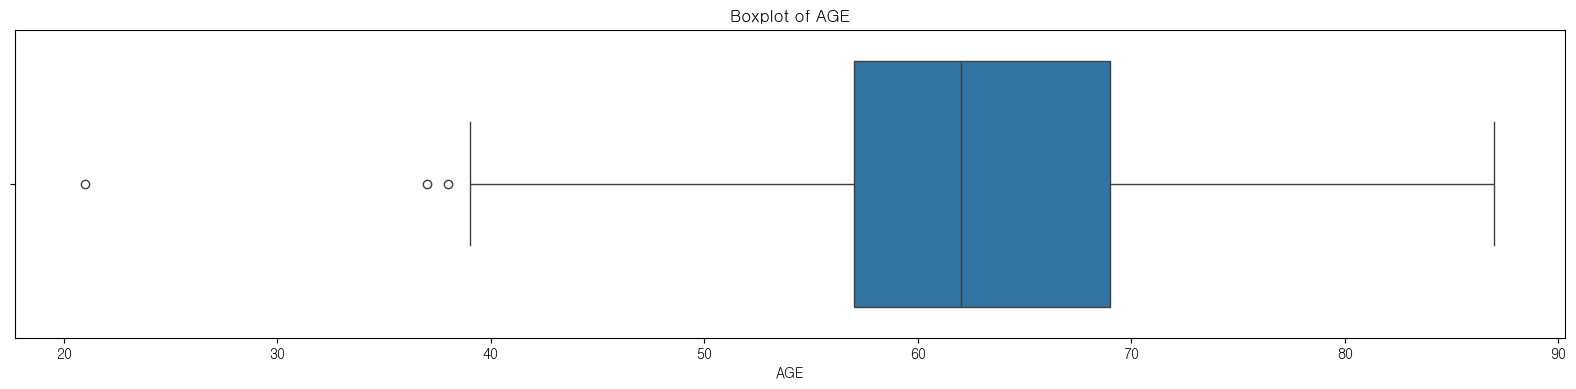

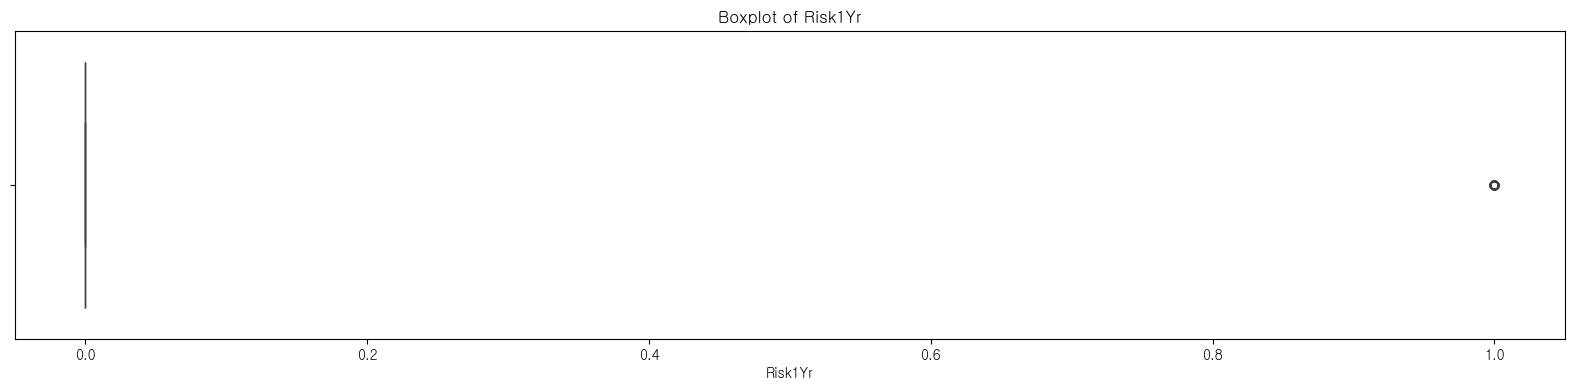

In [31]:
summarize_dataframe(df_thoraric)

In [32]:
df_thoraric.head()

,PatientID,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [33]:
from sklearn.model_selection import train_test_split

# 특성과 라벨 분리
X = df_thoraric.drop(columns=['Risk1Yr'])  # 'label_column'은 라벨 열 이름
y = df_thoraric['Risk1Yr']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
from sklearn.svm import SVC

# SVM 모델 정의 및 학습
model = SVC(kernel='linear')  # 커널은 'linear', 'rbf' 등을 사용할 수 있음
model.fit(X_train, y_train)


SVC(kernel='linear')

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8936170212765957
Confusion Matrix:
 [[84  0]
 [10  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        84
           1       0.00      0.00      0.00        10

    accuracy                           0.89        94
   macro avg       0.45      0.50      0.47        94
weighted avg       0.80      0.89      0.84        94



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [36]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [37]:
from sklearn.svm import SVC

# 최적 하이퍼파라미터로 SVM 모델 정의 및 학습
model = SVC(C=0.1, kernel='linear')
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8936170212765957
Confusion Matrix:
 [[84  0]
 [10  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        84
           1       0.00      0.00      0.00        10

    accuracy                           0.89        94
   macro avg       0.45      0.50      0.47        94
weighted avg       0.80      0.89      0.84        94



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif